# **Project at Unified Mentor**

 

**Objective**:


`To predict whether an employee will leave the company (attrition) based on various features such as age, job satisfaction, salary, etc.`






***Created by: Rajat Singh***


In [1]:
#installing Required Libraries

# !pip install requirements.txt

In [2]:
#Required Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
import os , sys

warnings.filterwarnings("ignore")

In [3]:
file_path = os.path.join(os.getcwd() , "dataset/HRDataset_v14.csv") #file path of dataset
df= pd.read_csv(file_path) #csv dataset as dataframe

In [4]:
df.shape

(311, 36)

**Very small Dataset**

In [5]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [7]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [8]:
df[["GenderID" , "Sex"]] # one represented as Male and Zero  as Female 

,GenderID,Sex
0,1,M
1,1,M
2,0,F
3,0,F
4,0,F
...,...,...
306,1,M
307,0,F
308,0,F
309,0,F


In [9]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [10]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

**We can see that there are more than 200 null values inside DateofTermination column .**


`Lets first Observe data then check if there are any Ouliers  Present in each Numericals column . I will remove outliers by Using IQR method  Values Lower than 25 % Quartile and More than 75 % Quartile Values`

In [11]:
# First Lets see there is any duplicated Values or not
df.duplicated().sum()

0

In [12]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

**There are two date columns , coverting date columns to pd.datetime format**

In [14]:
df["DOB"] = pd.to_datetime(df["DOB"])  # reassigning  DOB columns to datetime
df["LastPerformanceReview_Date"] = pd.to_datetime(df["LastPerformanceReview_Date"]) #reassigning columns to datetime

In [15]:
df[["LastPerformanceReview_Date" ,"DOB" ]].dtypes #Converted into datetime format

LastPerformanceReview_Date    datetime64[ns]
DOB                           datetime64[ns]
dtype: object

In [16]:
#Created Extra columns using datetime  

#For DOB
df["Day_of_birth"] = df["DOB"].dt.day
df["year_of_birth"] = df["DOB"].dt.year
df["month_of_birth"] = df["DOB"].dt.month

#for LastPerformanceReview_Date columns
df["Last_Perform_Review_day"] = df["LastPerformanceReview_Date"].dt.day
df["Last_Perform_Review_month"]= df["LastPerformanceReview_Date"].dt.month
df["Last_Perform_Review_year"]= df["LastPerformanceReview_Date"].dt.year


In [17]:
df.drop(["DOB" , "LastPerformanceReview_Date"] , axis=1  , inplace=True) # Droping Unecessary columns  
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Day_of_birth,year_of_birth,month_of_birth,Last_Perform_Review_day,Last_Perform_Review_month,Last_Perform_Review_year
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,5,0,0,1,10,1983,7,17,1,2019
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,3,6,0,17,5,1975,5,24,2,2016
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,3,0,0,3,19,1988,9,15,5,2012
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,5,0,0,15,27,1988,9,3,1,2019
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,4,0,0,2,8,1989,9,1,2,2016


In [18]:
# Lets first Separate each categorical and Numericals Columns

numericals_columns = [ col for col in df.columns if df[col].dtypes!="O"] # Numericals columns
categoricals_column = [ col for col in df.columns if df[col].dtypes=="O"]# Categorical  Columns


In [19]:
df[numericals_columns].head()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Day_of_birth,year_of_birth,month_of_birth,Last_Perform_Review_day,Last_Perform_Review_month,Last_Perform_Review_year
0,10026,0,0,1,1,5,4,0,62506,0,...,5,0,0,1,10,1983,7,17,1,2019
1,10084,1,1,1,5,3,3,0,104437,1,...,3,6,0,17,5,1975,5,24,2,2016
2,10196,1,1,0,5,5,3,0,64955,1,...,3,0,0,3,19,1988,9,15,5,2012
3,10088,1,1,0,1,5,3,0,64991,0,...,5,0,0,15,27,1988,9,3,1,2019
4,10069,0,2,0,5,5,3,0,50825,1,...,4,0,0,2,8,1989,9,1,2,2016


In [20]:
df[categoricals_column].head()

,Employee_Name,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore
0,"Adinolfi, Wilson K",Production Technician I,MA,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds
1,"Ait Sidi, Karthikeyan",Sr. DBA,MA,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets
2,"Akinkuolie, Sarah",Production Technician II,MA,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets
3,"Alagbe,Trina",Production Technician I,MA,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets
4,"Anderson, Carol",Production Technician I,MA,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets


**Salary is most Important Features based on this  i will do further analysis and Compare each column with salary  to find Outliers.Based on this analysis i will consider which features are most important for Model training**

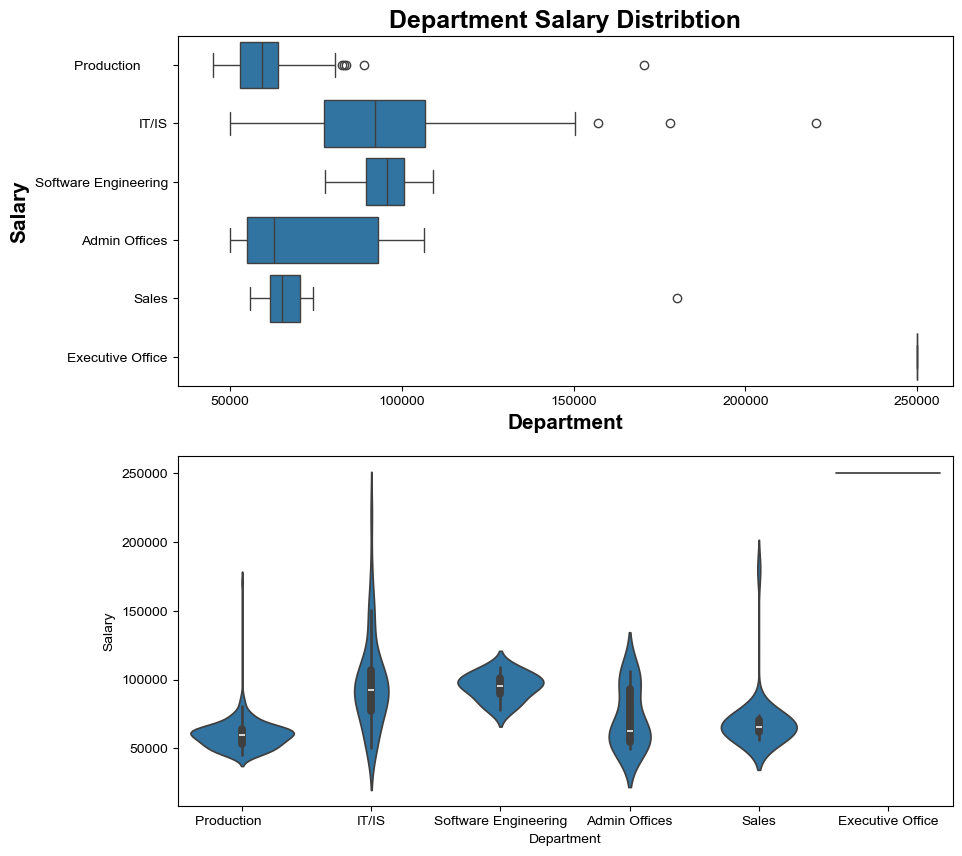

In [21]:
#Lets Observe Outliers and Handle it using Lower bound and Higher bound , we will keep values between 25 to 75 perecent 

fig , (ax1, ax2)=plt.subplots(2 , 1 , figsize=(10,10))
sns.set_palette("Set2")
sns.set_style("darkgrid")
sns.boxplot(data=df , x="Salary" , y="Department" , ax=ax1)
ax1.set_xlabel("Department" , fontsize=15 , fontweight="bold")
ax1.set_ylabel("Salary" , fontsize=15 , fontweight="bold")
ax1.set_title("Department Salary Distribtion" , fontsize=18 , fontweight="bold")
sns.violinplot(data=df , x="Department" , y="Salary"   , ax=ax2 )
ax1.set_xlabel("Department" , fontsize=15 , fontweight="bold")
ax1.set_ylabel("Salary" , fontsize=15 , fontweight="bold")
ax1.set_title("Department Salary Distribtion" , fontsize=18 , fontweight="bold")
fig.show()

**IT /IS sector and Production Department have high salary  , there salary will impact model training and Accuracy.**

In [22]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Day_of_birth,year_of_birth,month_of_birth,Last_Perform_Review_day,Last_Perform_Review_month,Last_Perform_Review_year
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,5,0,0,1,10,1983,7,17,1,2019
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,3,6,0,17,5,1975,5,24,2,2016
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,3,0,0,3,19,1988,9,15,5,2012
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,5,0,0,15,27,1988,9,3,1,2019
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,4,0,0,2,8,1989,9,1,2,2016


**Analysis  Based on Gender**

In [23]:
fig = px.box(df , 
             y="Salary" ,
             x="Sex"  , 
             color="Sex" , 
             title="<b>Salary Distribution Based on Gender<b>" ,
             width=1000,
             height=500)


fig.show()

**Lets Observe  Average Salary based on Postion and Department**

In [24]:
postion_wise_salary  = df.groupby("Position")["Salary"].mean().sort_values(ascending=False).reset_index()

postion_wise_salary

,Position,Salary
0,President & CEO,250000.000000
1,CIO,220450.000000
2,Director of Sales,180000.000000
3,IT Director,178000.000000
4,Director of Operations,170500.000000
5,IT Manager - Infra,157000.000000
6,Data Architect,150290.000000
7,IT Manager - DB,144959.500000
8,IT Manager - Support,138888.000000
9,Principal Data Architect,120000.000000


In [25]:
custom_colors = [
    "#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A", "#19D3F3", "#FF6692", "#B6E880",
    "#FF97FF", "#FECB52", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B",
    "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF", "#393b79", "#5254a3", "#6b6ecf", "#9c9ede",
    "#637939", "#8ca252", "#b5cf6b", "#cedb9c", "#8c6d31", "#bd9e39", "#e7ba52", "#e7cb94",
    "#843c39", "#ad494a", "#d6616b", "#e7969c", "#7b4173", "#a55194", "#ce6dbd", "#de9ed6"
]

fig = px.bar(postion_wise_salary , 
            y="Position", 
            x="Salary" ,
            color="Position",
            height=650, 
            width=1300,
            color_discrete_sequence = custom_colors)


fig.show()